In [1]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client
client = OpenAI()

# Load the DataFrame containing verbs
df = pd.read_csv('verbs.csv')

# Define a translation function using the OpenAI API
def translate_verb(verb):
    completion = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect verb into English using word-by-word translation." +
             " The output must not be an infinitive verb. No explanations are needed in the output"},
            {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},
            {"role": "user", "content": "شرب"},
            {"role": "assistant", "content": "drink"},
            {"role": "user", "content": "ستدعا"},
            {"role": "assistant", "content": "summon"},
            {"role": "user", "content": "طفا"},
            {"role": "assistant", "content": "turn off"},
            {"role": "user", "content":  f'{verb}' }
        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

# Apply the translation function to the 'darija_ar' column
df['english_translation'] = df['darija_ar'].apply(translate_verb)

# Display or save the resulting DataFrame
print(df)


           n1       n2     n3       n4       n5    n6 darija_ar         eng  \
0         kla      NaN    NaN      NaN      NaN   NaN       كلا         eat   
1        chrb    chreb    NaN      NaN      NaN   NaN       شرب       drink   
2       dkhel     dkhl  dkhal     d5el      d5l  d5al       دخل       enter   
3        khrj    khraj  khrej      5rj     5raj  5rej       خرج      go out   
4        fhem      fhm   fham     f8em      f8m  f8am       فهم  understand   
...       ...      ...    ...      ...      ...   ...       ...         ...   
1027   bllegh      NaN    NaN      NaN      NaN   NaN      بلّغ      notify   
1028      Tfa      NaN    NaN      NaN      NaN   NaN       طفا    turn off   
1029    ryye7    riye7   ryy7      NaN      NaN   NaN      ريّح    sit down   
1030    ghech  ghechch   ghch    ghach      NaN   NaN        غش       cheat   
1031  9chcher    9cher  qcher  qchcher  9chchar   NaN      قشّر        peel   

     english_translation  
0                    eat

[('eat', 'eat', 1.0, True), ('drink', 'drink', 1.0, True), ('enter', 'enter', 1.0, True), ('exit', 'go_out', 1.0, True), ('understand', 'understand', 1.0, True), ('explain', 'explain', 1.0, True), ('read', 'learn', 1.0, True), ('read', 'teach', 0.25, False), ('hear', 'hear', 1.0, True), ('saw', 'see', 1.0, True), ('smell', 'smell', 1.0, True), ('knocked', 'taste', 0.2, False), ('measured', 'touch', 0.25, False), ('walked', 'go', 0.5, True), ('came', 'come', 1.0, True), ('go_out', 'ascend', 0.3333333333333333, False), ('descend', 'go_down', 1.0, True), ('did', 'swim', 0.3333333333333333, False), ('drown', 'drown', 1.0, True), ('wear', 'wear', 1.0, True), ('asked', 'take_off', 0.25, False), ('bought', 'buy', 1.0, True), ('sold', 'sell', 1.0, True), ('cooked', 'bargain', 0.125, False), ('write', 'write', 1.0, True), ('wipe', 'clean', 0.16666666666666666, False), ('hit', 'hit', 1.0, True), ('greet', 'salute', 0.5, True), ('tired', 'fatigue', 1.0, True), ('crumble', 'exhaust', 0.25, False),

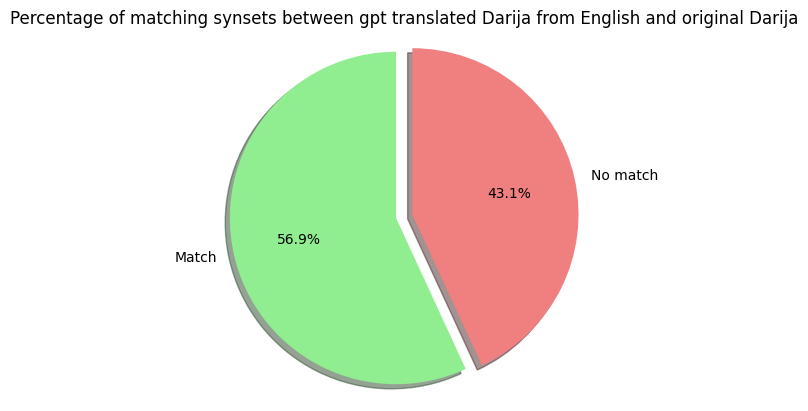

In [2]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

eng = df['eng']
transl = df['english_translation']

transl = [verb.replace(" ", "_") for verb in transl]
eng = [verb.replace(" ", "_") for verb in eng]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()

13: da99, daa9 : knocked, tasted
14: 9as, 9aas: measured, touch

the translation is accurate, checked it myself. it confuses verbs for tother dialects.

next up work with two transliteration and darija arabic for more context. try it out.

In [2]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client
client = OpenAI()

# Load the DataFrame containing verbs
df = pd.read_csv('verbs.csv')

# Define a translation function using the OpenAI API
def translate_verb(arb, latin):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect verb into English using word-by-word translation."+ 
             "The output must not be an infinitive verb. No explanations are needed in the output"},
            {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},
            {"role": "user", "content": "شرب / chreb"},
            {"role": "assistant", "content": "drink"},
            {"role": "user", "content": "ستدعا / sted3a"},
            {"role": "assistant", "content": "summon"},
            {"role": "user", "content": "طفا / tfa"},
            {"role": "assistant", "content": "turn off"},
            {"role": "user", "content":  f"{arb} / {latin}" }
        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

df['transl'] = df.apply(lambda row: translate_verb(row['darija_ar'], row['n1']), axis=1)


# Display or save the resulting DataFrame
print(df)


           n1       n2     n3       n4       n5    n6 darija_ar         eng  \
0         kla      NaN    NaN      NaN      NaN   NaN       كلا         eat   
1        chrb    chreb    NaN      NaN      NaN   NaN       شرب       drink   
2       dkhel     dkhl  dkhal     d5el      d5l  d5al       دخل       enter   
3        khrj    khraj  khrej      5rj     5raj  5rej       خرج      go out   
4        fhem      fhm   fham     f8em      f8m  f8am       فهم  understand   
...       ...      ...    ...      ...      ...   ...       ...         ...   
1027   bllegh      NaN    NaN      NaN      NaN   NaN      بلّغ      notify   
1028      Tfa      NaN    NaN      NaN      NaN   NaN       طفا    turn off   
1029    ryye7    riye7   ryy7      NaN      NaN   NaN      ريّح    sit down   
1030    ghech  ghechch   ghch    ghach      NaN   NaN        غش       cheat   
1031  9chcher    9cher  qcher  qchcher  9chchar   NaN      قشّر        peel   

            transl  
0              eat  
1        

[(0, 'eat', 'eat', 1.0, True), (1, 'drink', 'drink', 1.0, True), (2, 'enter', 'enter', 1.0, True), (3, 'go_out', 'go_out', 1.0, True), (4, 'understand', 'understand', 1.0, True), (5, 'explain', 'explain', 1.0, True), (6, 'read', 'learn', 1.0, True), (7, 'read', 'teach', 0.25, False), (8, 'hear', 'hear', 1.0, True), (9, 'saw', 'see', 1.0, True), (10, 'smell', 'smell', 1.0, True), (11, 'call', 'taste', 0.3333333333333333, False), (12, 'measure', 'touch', 0.25, False), (13, 'go', 'go', 1.0, True), (14, 'come', 'come', 1.0, True), (15, 'go_out', 'ascend', 0.3333333333333333, False), (16, 'go_down', 'go_down', 1.0, True), (17, 'live', 'swim', 0.25, False), (18, 'drown', 'drown', 1.0, True), (19, 'wear', 'wear', 1.0, True), (20, 'asked', 'take_off', 0.25, False), (21, 'buy', 'buy', 1.0, True), (22, 'sell', 'sell', 1.0, True), (23, 'iron', 'bargain', 0.09090909090909091, False), (24, 'write', 'write', 1.0, True), (25, 'wipe', 'clean', 0.16666666666666666, False), (26, 'hit', 'hit', 1.0, True)

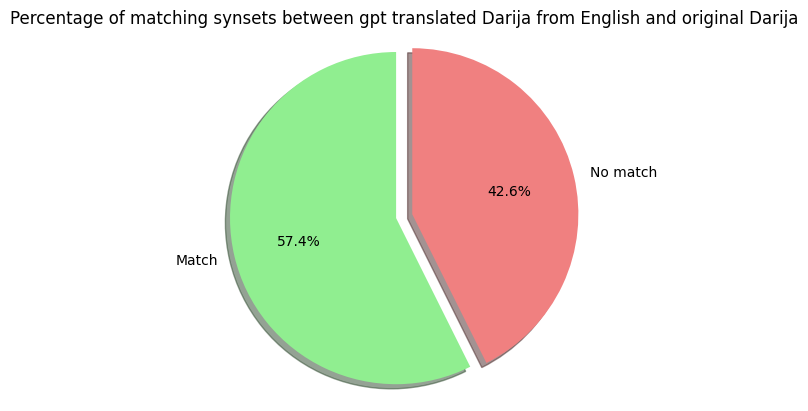

In [4]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

eng = df['eng']
transl = df['transl']

transl = [verb.replace(" ", "_") for verb in transl]
eng = [verb.replace(" ", "_") for verb in eng]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.VERB)
    synsets2 = wn.synsets(word2, pos=wn.VERB)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((i, word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()

These are the examples of words that didnt match in the first 50 words from the verbs.

I will highlight the most important for an easy read.

- {9rra read teach}: in the prononciation model does not interpret articulation and emphasis doesnt recognise.

- {Da9 knocked taste}: darija doesnt use letter "dh" instead it uses a lighter one in speech and writing d and that makes an interpretation difference for the model. Tho the model doesnt notice the emphasis difference and base its translation presumably on that letter. possible reversion to arabic. 

- {9as measured touch}:  revert to msa.

- {Tala3 go_out ascend} : in darija this has a deviated meaning the msa might have deviated long ago => makes sense

- {3am live swim}  can be interpreted as "year" but also has a meaning in the dictionary of arabic with swim but it's an old meaning that's not usually used in Arabic nowadays only in Darija. Model has ouputted a random verb which at least is conform to the query of a verb output.  

- {slat asked take_off}. has outputted a verb that sounds the same. Reversion to MSA.

- {ttawa iron bargain} I don't understand the model's rationale.  

- {ms7 wipe clean}: this is both the wordnet's fault for giving it too low of similarity 0.16 and the dataset's, cos it has both meanings (that can only be understood in context).

- {tskhskh whisper exhaust} : unique to darija

- {ghdb get-angry anger} : model doesnt follow instruction as told 

- {dar HOUSE DO}: has a right interpretation but as a name. model doesnt recognize it as a verb. unique to darija

- {3ndo he-has have} : doesnt follow instructions

- {chedd tighten get}: meaning can only be infered from context in darija

- {ba come want} : meaningless interpretation

- {wlla or become}

- {3na have mean}


CASES: 
Correct guess but in a different context in darija due to emphasis 2  

Correct guess but only in Standard Arabic (revert to standard arabic) 3

Correct but model doesnt follow instructions: 4
  - adds an article or "to" or "will", etc. and doesnt answer with a word-by-word as instructed. 2
  - interprets it as a name 1
  - intereprets it as a conjunction 1

Not correct 5
  - unique in darija 3
  - exists in standard arabic but missed it 2

other 1


One other 
I wonder if emphasis issues will be resolved with context. (sentences?)

In [4]:

from openai import OpenAI
import pandas as pd
client = OpenAI()

def translate_verb():
    completion = client.chat.completions.create(
        model="gpt-4",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect verb into English using word-by-word translation. The output must not be an infinitive verb. No explanations are needed in the output"},
            {"role": "assistant", "content": "OK, I understand. I am ready for the verb translation."},
            {"role": "user", "content":  "فهّم" }
        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

m = translate_verb() 
# Display or save the resulting DataFrame
print(m)

Understood
